**Submitted by:**<br>
Anagha Lailesh K<br>
e-mail: anaghalaileshk@gmail.com

---






# Task Instructions

Download the Super Store Excel.

Python Task
1. Load the Superstore.xls into pandas in Python
2. There is three sheet behind the superstore Orders,Returns,People
3. Join Orders, People get me a Based on the Region wise need to look out Sales
4. Plot into visual or Table Format Product Name Wise Sales and Quantity
5. TOP 10 Product Name which is sold based on the Sales Quantity
6. Category wise Sales value
7. Product, Category wise Sales Value
8. TOP 10 Customer have highest sales
9. Connect Orders sheet, return sheet show me the which customer have more return sort by desc.

Added on Points
Plot the task list in the visualization you can use any visualization plot in the python.

Once you done, Upload your task into GitHub and share me the link .

If Any Queries ping me ganesan.r@idfreshfood.com






In [1]:
# Importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go, express as px

### Q1. Load the Superstore.xls into pandas in Python

In [2]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Loading the file into a pandas DataFrame object
xls = pd.ExcelFile('/content/drive/MyDrive/ID Fresh Food/Superstore.xls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Q2. There is three sheet behind the superstore Orders,Returns,People

In [3]:
# Checking for sheet names
xls.sheet_names

['Orders', 'Returns', 'People']

In [4]:
# Assigning each sheet as separate DataFrames
orders = pd.read_excel(xls, sheet_name="Orders")
returns = pd.read_excel(xls, sheet_name="Returns")
people = pd.read_excel(xls, sheet_name="People")

In [5]:
# Display first three rows of Orders
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
# Display first three rows of Returns
returns.head(3)

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345


In [7]:
# Display first three rows of People
people.head(3)

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central


In [8]:
# Display information about the three sheets

i = 0

for j in [orders, returns, people]:
    print("\n\n", "-" * 20, xls.sheet_names[i].upper(), "-" * 20, "\n")   # display the sheet name
    print(j.info())   # display information
    i += 1



 -------------------- ORDERS -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       999

**INFERENCE:**

There are no missing values in any of the DataFrames.


### Q3. Join Orders, People get me a Based on the Region wise need to look out Sales

In [9]:
# Listing distinct product names
people['Region'].value_counts()

West       1
East       1
Central    1
South      1
Name: Region, dtype: int64

**INFERENCE:**

There are 4 distinct regions.

*Joining the DataFrames 'orders' and 'people' in such a way that we are able to analyze the region-wise sales. Thus, only columns 'Sales' and 'Region' are considered from the 'orders' DataFrame.*

In [10]:
# Joining (RIGHT JOIN) Orders and People tables based on Regions
orders_people = pd.merge(orders[['Sales', 'Region']], people, on='Region', how='right')

orders_people

,Sales,Region,Person
0,14.620,West,Anna Andreadi
1,48.860,West,Anna Andreadi
2,7.280,West,Anna Andreadi
3,907.152,West,Anna Andreadi
4,18.504,West,Anna Andreadi
...,...,...,...
9989,140.750,South,Cassandra Brandow
9990,85.980,South,Cassandra Brandow
9991,79.990,South,Cassandra Brandow
9992,206.100,South,Cassandra Brandow


In [11]:
# Grouping region-wise total sales
regions_sales = orders_people.groupby('Region').agg({'Sales': 'sum'}).rename(columns={'Sales': 'Total_Sales'}).reset_index()

regions_sales

,Region,Total_Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [12]:
# Alternate way
# pd.merge(orders[['Sales', 'Region']], people, on='Region', how='right').groupby('Region').agg({'Sales': 'sum'}).rename(columns={'Sales': 'Total_Sales'}).reset_index()

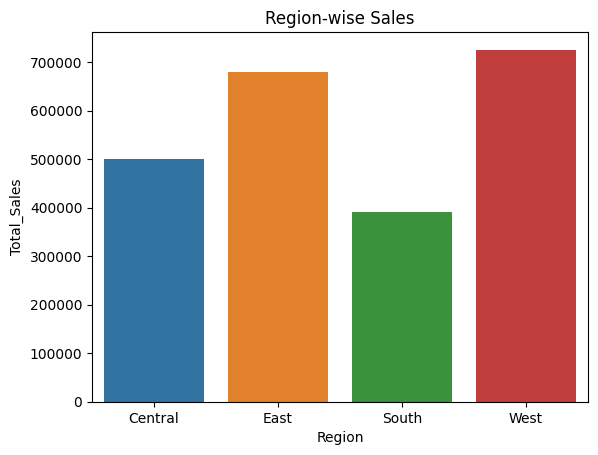

In [13]:
# Bar plot for region-wise total sales
sns.barplot(x=regions_sales['Region'], y=regions_sales['Total_Sales'])
plt.xlabel('Region')
plt.ylabel('Total_Sales')
plt.title('Region-wise Sales')
plt.show()

**INFERENCE:**

Region West has the maximum sales while region South has the least sales.

### Q4. Plot into visual or Table Format Product Name Wise Sales and Quantity

In [14]:
# Listing distinct product names
orders['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

**INFERENCE:**

There are 1850 distinct products.

In [15]:
# Grouping total sales and total quantities of each product
products_sold = orders.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'}).rename(columns={'Sales': 'Total_Sales', 'Quantity': 'Total_Quantity'}).reset_index()

products_sold

,Product Name,Total_Sales,Total_Quantity
0,"""While you Were Out"" Message Book, One Form pe...",25.228,8
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,11
2,#10 Self-Seal White Envelopes,108.682,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37
...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,24
1846,iOttie HLCRIO102 Car Mount,215.892,12
1847,iOttie XL Car Mount,223.888,14
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,29


In [16]:
# Interactive scatter plot of product-wise sales and quantities

fig = go.Figure()

for category in products_sold['Product Name'].unique():
    fig.add_trace(go.Scatter(
        x=products_sold[products_sold['Product Name'] == category]['Total_Sales'],
        y=products_sold[products_sold['Product Name'] == category]['Total_Quantity'],
        mode='markers',
        name=category
    ))

fig.update_layout(
    title='Scatter Plot of Total Sales vs. Total Quantity according to each Product',
    xaxis_title='Total Sales',
    yaxis_title='Total Quantity',
    showlegend=True
)

fig.show()

**INFERENCE:**

1. The maximum sales are contributed by the product named 'Canon imageCLASS 2200 Advanced Copier'.
2. Staples are the most selling product.

### Q5. TOP 10 Product Name which is sold based on the Sales Quantity

In [17]:
# Sort the products_sold DataFrame by Total_Sales in descending order
sorted_sold = products_sold[['Product Name', 'Total_Sales']].sort_values(by='Total_Sales', ascending=False)

sorted_sold.head(3)

,Product Name,Total_Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480


In [18]:
# Display the top 10 products based on sales
print(sorted_sold['Product Name'].head(10).to_string(index=False))

             Canon imageCLASS 2200 Advanced Copier
Fellowes PB500 Electric Punch Plastic Comb Bind...
Cisco TelePresence System EX90 Videoconferencin...
      HON 5400 Series Task Chairs for Big and Tall
        GBC DocuBind TL300 Electric Binding System
  GBC Ibimaster 500 Manual ProClick Binding System
              Hewlett Packard LaserJet 3310 Copier
HP Designjet T520 Inkjet Large Format Printer -...
         GBC DocuBind P400 Electric Binding System
       High Speed Automatic Electric Letter Opener


In [19]:
# Sort the products_sold DataFrame by Total_Quantity in descending order
sorted_qty = products_sold[['Product Name', 'Total_Quantity']].sort_values(by='Total_Quantity', ascending=False)

sorted_qty.head(3)

,Product Name,Total_Quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150


In [20]:
# Display the top 10 products based on quantity
print(sorted_qty['Product Name'].head(10).to_string(index=False))

                                           Staples
                                   Staple envelope
                                 Easy-staple paper
                           Staples in misc. colors
                        KI Adjustable-Height Table
                           Avery Non-Stick Binders
                           Storex Dura Pro Binders
GBC Premium Transparent Covers with Diagonal Li...
        Situations Contoured Folding Chairs, 4/Set
                        Staple-based wall hangings


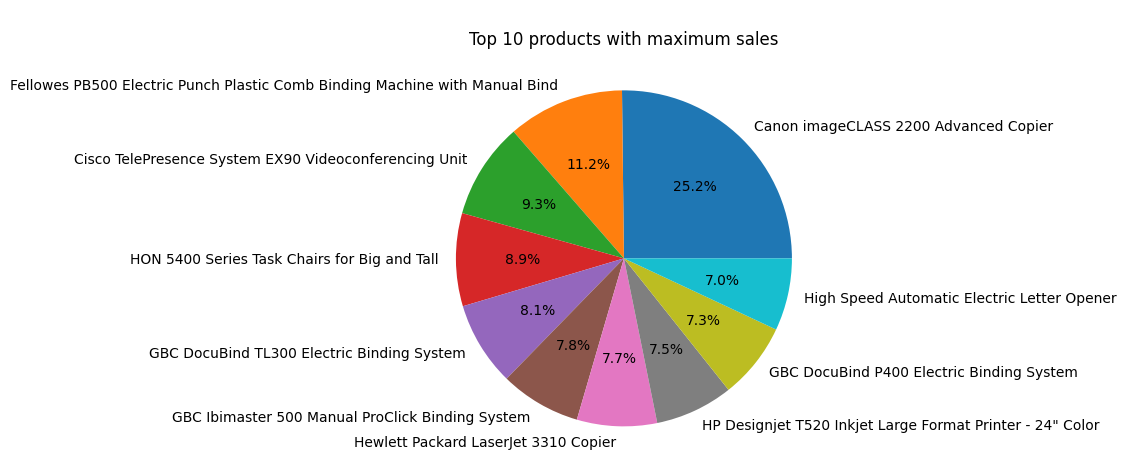

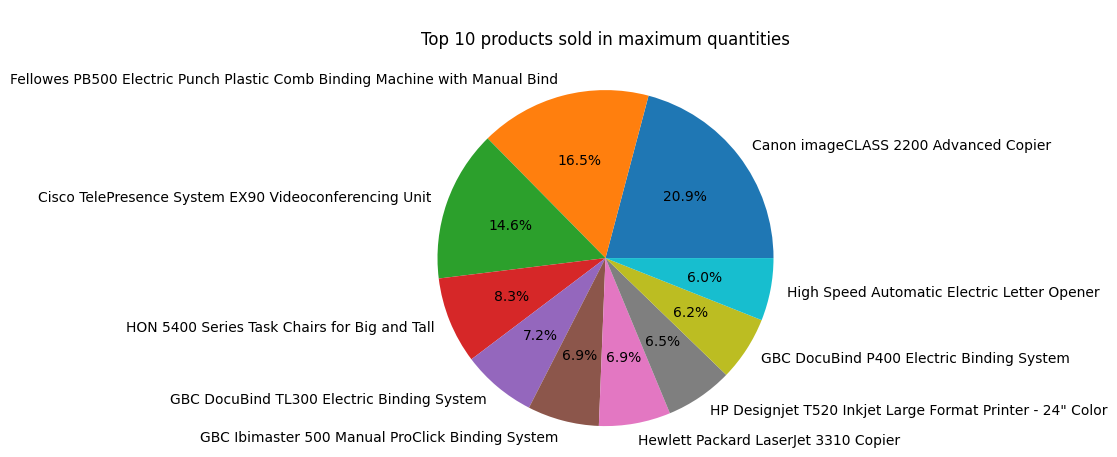

In [21]:
# Pie chart for Product Sales
plt.pie(sorted_sold['Total_Sales'].head(10), labels=sorted_sold['Product Name'].head(10).unique(), autopct='%1.1f%%')
plt.title('\nTop 10 products with maximum sales\n')
plt.axis('equal')
plt.show()

print("\n\n\n")

# Pie chart for Product Quantities
plt.pie(sorted_qty['Total_Quantity'].head(10), labels=sorted_sold['Product Name'].head(10).unique(), autopct='%1.1f%%')
plt.title('\nTop 10 products sold in maximum quantities\n')
plt.axis('equal')
plt.show()

### Q6. Category wise Sales value

In [22]:
# Listing distinct product names
orders['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

**INFERENCE:**

There are 3 distinct categories.

In [23]:
# Grouping total sales based on category
category_sales = orders.groupby('Category').agg({'Sales': 'sum'}).rename(columns={'Sales': 'Total_Sales'}).reset_index()
category_sales

,Category,Total_Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [24]:
# Bar plot for total sales based on category
fig = go.Figure(data=[go.Bar(x=category_sales['Category'], y=category_sales['Total_Sales'])])
fig.update_layout(xaxis_title='Category', yaxis_title='Total_Sales', title='Category-wise Sales')
fig.show()

**INFERENCE:**

Maximum sales are contributed by the technology category.

### Q7. Product, Category wise Sales Value

In [25]:
# Grouping total sales based on product and category
product_category_sales = orders.groupby(['Product Name', 'Category']).agg({'Sales': 'sum'}).rename(columns={'Sales': 'Total_Sales'}).reset_index()
product_category_sales

,Product Name,Category,Total_Sales
0,"""While you Were Out"" Message Book, One Form pe...",Office Supplies,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",Office Supplies,41.300
2,#10 Self-Seal White Envelopes,Office Supplies,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",Office Supplies,488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Office Supplies,286.672
...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,Technology,477.660
1846,iOttie HLCRIO102 Car Mount,Technology,215.892
1847,iOttie XL Car Mount,Technology,223.888
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,Technology,442.554


In [26]:
# Interactive plot for total sales based on product and category

fig = px.scatter(product_category_sales, x='Product Name', y='Total_Sales', color='Category',
                 hover_data=['Product Name', 'Category', 'Total_Sales'])
fig.show()

### Q8. TOP 10 Customer have highest sales

In [27]:
# Grouping and sorting (descending order) total sales of each customer
top_customers = orders.groupby('Customer Name').agg({'Sales': 'sum'}).rename(columns={'Sales': 'Total_Sales'}).sort_values(by='Total_Sales', ascending=False).reset_index()
top_customers

,Customer Name,Total_Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Roy Skaria,22.328
789,Mitch Gastineau,16.739
790,Carl Jackson,16.520
791,Lela Donovan,5.304


In [28]:
# Display the top 10 customers who spent maximum amount of money
print(top_customers['Customer Name'].head(10).to_string(index=False))

       Sean Miller
      Tamara Chand
      Raymond Buch
      Tom Ashbrook
     Adrian Barton
      Ken Lonsdale
      Sanjit Chand
      Hunter Lopez
      Sanjit Engle
Christopher Conant


In [29]:
# Interactive pie chart for top 10 customers based on sales
fig_pie = px.pie(top_customers.head(10), names='Customer Name', values='Total_Sales', title='Top 10 Customers based on Sales')
fig_pie.show()

**INFERENCE:**

Sean Miller has spent about 25043.05 units of money which is 16.3% of the amount of money spent by the top 10 customers.

### Q9. Connect Orders sheet, return sheet show me the which customer have more return sort by desc.

In [30]:
# Checking how many orders have been returned
returns['Returned'].value_counts()

Yes    296
Name: Returned, dtype: int64

**INFERENCE:**

There are 296 instances of returning previous orders.

In [31]:
# Joining (FULL OUTER JOIN) 'orders' and 'returns' based on Order ID
orders_returns = pd.merge(orders, returns, on='Order ID')
orders_returns.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.56,2,0.0,2.4824,Yes
1,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,Yes
2,21,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.2,7.3840,Yes


In [32]:
# Checking how many products have been returned
orders_returns['Returned'].value_counts()

Yes    800
Name: Returned, dtype: int64

**INFERENCE:**

Although there are only 296 instances of returning previous orders, there are 800 instances of returns in the orders_returns DataFrame. This is because an order may contain more than one product and return of each product by the customers is recorded in separate rows of the DataFrame.

In [33]:
# Grouping and sorting (descending order) total number of products returned by customer
top_returns = orders_returns.groupby('Customer Name').agg({'Returned': 'count'}).rename(columns={'Returned': 'Number of returns'}).sort_values(by='Number of returns', ascending=False).reset_index()
top_returns

,Customer Name,Number of returns
0,Seth Vernon,14
1,Ted Butterfield,13
2,William Brown,11
3,Anthony Johnson,11
4,Clay Ludtke,10
...,...,...
242,Penelope Sewall,1
243,Benjamin Venier,1
244,John Grady,1
245,Bill Donatelli,1


In [34]:
# Display the name of customer who has returned maximum number of products
print(top_returns['Customer Name'].head(1).to_string(index=False))

Seth Vernon


In [35]:
# Interactive bar plot for the number of returns by customer
fig = px.bar(top_returns.head(20), x='Customer Name', y='Number of returns')
fig.update_layout(title='Return of Products by Customer', xaxis_title='Customer Name', yaxis_title='Number of Returns')
fig.show()